In [162]:
import requests as rq
from bs4 import BeautifulSoup as bs
import lxml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 構想 1: 驗證氣溫與購買商品的關係
### ex:可以在夏季時，推短袖買一送一，長袖外套半價等


In [182]:
t = list()
for month in range(12):
    url = 'https://www.cwb.gov.tw/V7/climate/monthlyData/Data/mD2017%s.htm' %(str(month+1))
    temp=pd.read_html(url)
    t.append(temp[0][1][25])#爬台北測站月平均溫度

In [136]:
df = pd.read_csv('Ntu_Orders.csv')
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')
index = pd.date_range('2017-1-1', periods=12, freq='M')

In [176]:
hot = list() #休閒短裙/褲每月總數量
cold = list() #高領衫/毛衣每月總數量
for m in range(12):
    a = df[(df['new_DateId'] <= index[m]) & (df['new_DateId'] >= '2017-%s'%str(m+1))]
    aa = pd.DataFrame(a.groupby(by='LevelFourCategoryName')['Quantity'].sum())
    hot.append(aa.Quantity['休閒短裙/褲'])
    cold.append(aa.Quantity['高領衫/毛衣'

In [177]:
hot

[2857, 3831, 10417, 15372, 17172, 11745, 9201, 6512, 6015, 8122, 8652, 5473]

In [178]:
cold

[412, 118, 51, 8, 2, 2, 7, 307, 95, 5071, 4907, 5079]

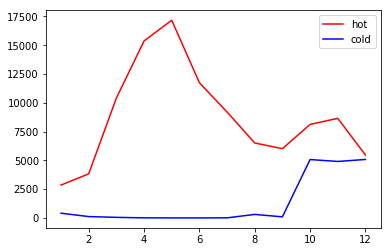

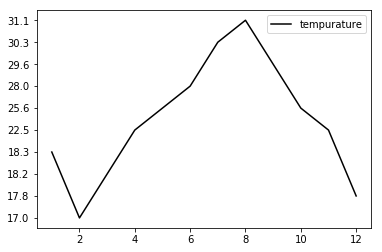

In [191]:
plt.plot(np.arange(len(hot))+1,hot,'r')
plt.plot(np.arange(len(cold))+1,cold,'b')

plt.legend(['hot','cold','tempurature'])
plt.show()
plt.plot(np.arange(len(t))+1,t,'k')
plt.legend(['tempurature'])
plt.show()

## 可以由氣溫得知是在最冷/熱2到3月前，顧客購買對應的衣物最多，可在此時推促銷

# 之後延伸:能依照當時各地區氣候在官網放相對應的商品
### ex:若台北正在下雨，在台北官網放雨衣、雨傘等商品